In [103]:
#MSE vs サーチケース
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

#reaction length
df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','Equivalentratio','CoefficientDiluent','Oxidizer','P0', 'T0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]','Lr']

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]

#XpcaFLRDED = XpcaFLRDED[~( XpcaFLRDED['Ea[KJ/kg]'] == 0)]

XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H4') | ~( XpcaFLRDED['Diluent'] == 'Ar')]

dfC2H2ARtrain =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar')]

dftrainval =  dfC2H2ARtrain[~( dfC2H2ARtrain['Fuel'] == 'C2H2') | ~( dfC2H2ARtrain['Diluent'] == 'N2')]

dftrainval = dftrainval.sample(frac=1)

X_train = dftrainval.drop(columns=['Equivalentratio','CoefficientDiluent','Diluent','Fuel','Lr','Oxidizer'])
y_train = dftrainval['Lr']

ss = StandardScaler()
sX_train = ss.fit_transform(X_train)

sol = ['adam']
act = ['relu']
hidd = []

for i in [6]:
    for j in [200]:
        b=[j]*i
        b=tuple(b)
        hidd.append(b)

alp=[1e-4]
param_grid = {'solver':sol,'activation':act,'hidden_layer_sizes':hidd,'alpha':alp}
grid1=GridSearchCV(MLPRegressor(), param_grid ,cv=2, n_jobs=4)
grid1.fit(sX_train,y_train)

print('Best parameters: {}'.format(grid1.best_params_))
print('Best cross-validation: {}'.format(grid1.best_score_))

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'solver': 'adam'}
Best cross-validation: 0.947399685303937


In [107]:
#MSE vs サーチケース
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

#reaction length
df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','Equivalentratio','CoefficientDiluent','Oxidizer','P0', 'T0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]','Lr']

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]

#XpcaFLRDED = XpcaFLRDED[~( XpcaFLRDED['Ea[KJ/kg]'] == 0)]

XpcaFLRDED = XpcaFLRDED.query('0.6>P0>0.5')

#XpcaFLRDED = XpcaFLRDED[(XpcaFLRDED['Equivalentratio'] == 1)]
dfC2H4ARtrain =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H4') | ~( XpcaFLRDED['Diluent'] == 'Ar')]
dfC2H4ARtest = XpcaFLRDED[(XpcaFLRDED['Fuel'] == 'C2H4') & (XpcaFLRDED['Diluent'] == 'Ar')]

#dfC3H6N2Otrain =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C3H6') | ~( XpcaFLRDED['Oxidizer'] == 'N2O')]
#dfC3H6N2Otest = XpcaFLRDED[(XpcaFLRDED['Fuel'] == 'C3H6') & (XpcaFLRDED['Oxidizer'] == 'N2O')]

dfC2H2ARtrain =  dfC2H4ARtrain[~( dfC2H4ARtrain['Fuel'] == 'C2H2') | ~( dfC2H4ARtrain['Diluent'] == 'Ar')]
dfC2H2ARtest = dfC2H4ARtrain[(dfC2H4ARtrain['Fuel'] == 'C2H2') & (dfC2H4ARtrain['Diluent'] == 'Ar')]

dftrainval =  dfC2H2ARtrain[~( dfC2H2ARtrain['Fuel'] == 'C2H2') | ~( dfC2H2ARtrain['Diluent'] == 'N2')]
dfC2H2N2test = dfC2H2ARtrain[(dfC2H2ARtrain['Fuel'] == 'C2H2') & (dfC2H2ARtrain['Diluent'] == 'N2')]

dftrainval = dftrainval.sample(frac=1)

X_trainval = dftrainval.drop(columns=['Equivalentratio','CoefficientDiluent'])
#dfC3H6N2Otest = dfC3H6N2Otest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer'])
dfC2H2ARtest = dfC2H2ARtest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer'])
dfC2H4ARtest = dfC2H4ARtest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer'])
dfC2H2N2test = dfC2H2N2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer'])

#XC3H6N2Otest = dfC3H6N2Otest.drop(columns=['Lr'])
XC2H2ARtest = dfC2H2ARtest.drop(columns=['Lr'])
XC2H4ARtest = dfC2H4ARtest.drop(columns=['Lr'])
XC2H2N2test = dfC2H2N2test.drop(columns=['Lr'])
print(XC2H4ARtest)

#yC3H6N2Otest = dfC3H6N2Otest['Lr']
yC2H2ARtest = dfC2H2ARtest['Lr']
yC2H4ARtest = dfC2H4ARtest['Lr']
yC2H2N2test = dfC2H2N2test['Lr']

X_train= X_trainval
yy_train = dftrainval['Lr']

X_train =  X_train.drop(columns=['Diluent','Fuel','Lr','Oxidizer'])

ssX_train = ss.transform(X_train)
sXC2H2ARtest = ss.transform(XC2H2ARtest)
sXC2H4ARtest = ss.transform(XC2H4ARtest)
sXC2H2N2test = ss.transform(XC2H2N2test)

         P0      T0  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  pcj[bar]   Tcj[K]  \
722  0.5112  295.75      85.49       37.714  1.5382    10.813  3251.05   
723  0.5412  295.65      85.43       37.714  1.5383    11.472  3258.61   
724  0.5748  296.25      85.81       37.714  1.5381    12.191  3266.52   
767  0.5500  293.65     115.32       36.970  1.5064    12.737  3396.41   
768  0.5500  300.15     119.68       36.970  1.5045    12.452  3394.15   
769  0.5500  300.15     119.68       36.970  1.5045    12.452  3394.15   

     Hcj[KJ/kg]  Mcj[kg/kmol]  γcj[-]  Mcj[-]   Tvn[K]  
722     1107.23        35.325  1.1865  5.4247  2192.36  
723     1109.23        35.335  1.1872  5.4316  2196.34  
724     1111.63        35.345  1.1879  5.4323  2200.26  
767     1249.66        33.555  1.1706  5.7190  2192.31  
768     1252.14        33.545  1.1704  5.6565  2194.91  
769     1252.14        33.545  1.1704  5.6565  2194.91  


In [108]:
# データの分布を主成分分析（PCA）で表現してみる
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#pca = KernelPCA(n_components=6,  kernel='rbf')
pca = PCA(n_components=6)
sX_train_pca = pca.fit_transform(ssX_train)
sX_train_pca = pd.DataFrame(sX_train_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
print(sX_train_pca)
#sXC3H6N2Otest_pca = pca.transform(sXC3H6N2Otest)
sXC2H2ARtest_pca = pca.transform(sXC2H2ARtest)
sXC2H4ARtest_pca = pca.transform(sXC2H4ARtest)
sXC2H2N2test_pca = pca.transform(sXC2H2N2test)
sXC2H2ARtest_pca = pd.DataFrame(sXC2H2ARtest_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
sXC2H4ARtest_pca = pd.DataFrame(sXC2H4ARtest_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
sXC2H2N2test_pca = pd.DataFrame(sXC2H2N2test_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

         PC1       PC2       PC3       PC4       PC5       PC6
0  -1.545177 -2.418834  0.221809 -0.018731  0.015998 -0.195719
1   2.260330  1.395078  0.173156  0.093342  0.485538 -0.755376
2   2.079665 -1.348223 -1.594781  1.310298 -0.806813  0.286068
3   1.693212 -0.490132 -1.720743 -1.095508  0.150609  0.859748
4   1.524892  0.305798 -0.833509 -0.221301  1.306047  0.375113
5  -0.005522 -1.555540 -1.362229 -0.946853  0.992464  0.787193
6   2.225640  1.668577  0.227987 -0.659820 -0.618707 -0.433862
7  -3.502075  1.204227  0.325168 -0.342221 -0.776317  0.181206
8   3.811228  2.782981 -0.235502  0.060002  0.640320 -0.345962
9   1.399372  0.260166 -0.808926 -0.172116  1.251384  0.337538
10 -0.962771 -2.066636  0.146731  0.116279 -0.105756 -0.509921
11 -3.466280  1.200791  0.319238 -0.298769 -0.675716  0.162648
12 -3.362509  1.209556  0.362939 -0.512687 -0.856207  0.209412
13 -0.506891 -1.874640 -0.831104 -0.437451  1.491905 -0.135615
14  1.167639  0.475697 -0.585371 -1.318588 -0.185927  0

In [110]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle

# One class support vector machine (OCSVM) モデルを構築する
clf = OneClassSVM(nu = 0.1)
y_train_class = clf.fit_predict(sX_train_pca)
#y_test_classC3H6N2O = clf.predict(sXC3H6N2Otest_pca)
y_test_classC2H2AR = clf.predict(sXC2H2ARtest_pca)
y_test_classC2H4AR = clf.predict(sXC2H4ARtest_pca)
y_test_classC2H2N2 = clf.predict(sXC2H2N2test_pca)

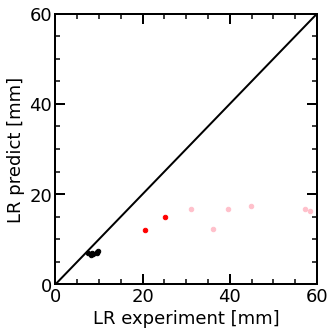

In [111]:

#resultC3H6N2O=grid1.predict(sXC3H6N2Otest_pca)
#MSEC3H6N2O=mean_squared_error(yC3H6N2Otest, resultC3H6N2O)
#R2C3H6N2O=r2_score(yC3H6N2Otest,resultC3H6N2O)

resultC2H2AR=grid1.predict(sXC2H2ARtest)
MSEC2H2AR=mean_squared_error(yC2H2ARtest, resultC2H2AR)
R2C2H2AR=r2_score(yC2H2ARtest,resultC2H2AR)

resultC2H4AR=grid1.predict(sXC2H4ARtest)
MSEC2H4AR=mean_squared_error(yC2H4ARtest, resultC2H4AR)
R2C2H4AR=r2_score(yC2H4ARtest,resultC2H4AR)

resultC2H2N2=grid1.predict(sXC2H2N2test)
MSEC2H2N2=mean_squared_error(yC2H2N2test, resultC2H2N2)
R2C2H2N2=r2_score(yC2H2N2test,resultC2H2N2)


plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5


plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
#plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == 1], resultC3H6N2O[y_test_classC3H6N2O == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == -1], resultC3H6N2O[y_test_classC3H6N2O == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2ARtest[y_test_classC2H2AR == -1], resultC2H2AR[y_test_classC2H2AR == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H4ARtest[y_test_classC2H4AR == 1], resultC2H4AR[y_test_classC2H4AR == 1],s=20,color='green', label = "AD_inside")
plt.scatter(yC2H4ARtest[y_test_classC2H4AR == -1], resultC2H4AR[y_test_classC2H4AR == -1],s=20,color='pink', label = "AD_outside")
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1],s=20,color='blue', label = "AD_inside")
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == -1], resultC2H2N2[y_test_classC2H2N2 == -1],s=20,color='red', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

# AD 内のデータについて R2 値を算出# AD 外のデータについて R2 値を算出
#print(r2_score(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1]),r2_score(yC2H2ARtest[y_test_classC2H2AR == -1], resultC2H2AR[y_test_classC2H2AR == -1]),'C2H2AR')
#print(r2_score(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1]),'C2H2N2')
#print(mean_squared_error(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1]),r2_score(yC2H2ARtest[y_test_classC2H2AR == -1], resultC2H2AR[y_test_classC2H2AR == -1]),'C2H2AR')
#print(mean_squared_error(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1]),'C2H2N2')
#print(r2_score(yC3H6N2Otest[y_test_classC3H6N2O == -1], resultC3H6N2O[y_test_classC3H6N2O == -1]),'C3H6N2O')
#print(r2_score(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1]),'C2H2AR')
#print(r2_score(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1]),r2_score(yC2H2N2test[y_test_classC2H2N2 == -1], resultC2H2N2[y_test_classC2H2N2 == -1]),'C2H2Ar')

In [8]:
# データの分布を主成分分析（PCA）で表現してみる
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#pca = KernelPCA(n_components=6,  kernel='rbf')
pca = PCA(n_components=6)
sX_train_pca = pca.fit_transform(sX_train)
sX_train_pca = pd.DataFrame(sX_train_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
print(sX_train_pca)
#sXC3H6N2Otest_pca = pca.transform(sXC3H6N2Otest)
sXC2H2ARtest_pca = pca.transform(sXC2H2ARtest)
sXC2H2N2test_pca = pca.transform(sXC2H2N2test)
sXC2H2ARtest_pca = pd.DataFrame(sXC2H2ARtest_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
sXC2H2N2test_pca = pd.DataFrame(sXC2H2N2test_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

         PC1       PC2       PC3       PC4       PC5       PC6
0   0.643536  5.448856 -0.277313  0.908250  0.613686  0.205936
1  -3.173380 -0.532783 -1.097276  1.385118 -0.732405  0.224543
2  -2.962930 -0.563264 -1.282448 -0.964739 -0.551786 -0.245555
3  -3.112696 -0.555077 -0.840469  1.025292 -0.228665  0.220083
4  -1.335112  0.308289  2.219659  0.820843 -0.263072 -0.206257
5  -3.010890 -0.563796 -1.207336 -0.357751 -0.534421 -0.109800
6  -2.858481  0.460954 -0.125572 -0.141782  0.059740 -0.412231
7  -3.466510 -1.098430 -1.022566  1.401185  0.049269  0.208899
8   1.552313 -0.622378 -0.400581  0.778967  0.687479 -0.125914
9  -2.949280 -0.587653 -1.346296 -1.504667 -0.579839 -0.386581
10  2.340493 -1.169899  1.662640 -0.046237  0.159227 -1.285954
11  0.740963  5.281622 -0.251347 -0.972680  1.140015 -0.143008
12  0.753302  4.029985  0.438160  0.271682  1.681315  0.527610
13  1.739563 -0.573155 -0.122379 -0.997401 -1.347478  0.608351
14  0.879584 -0.245378 -0.379206 -0.691419  0.344690 -0

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


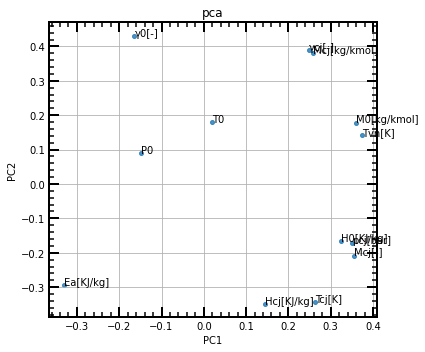

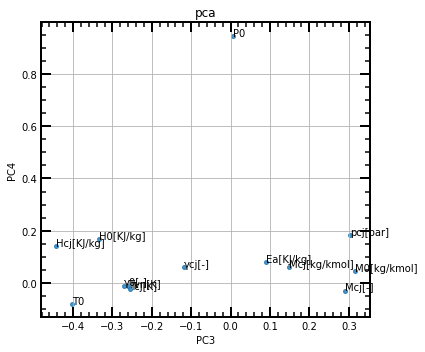

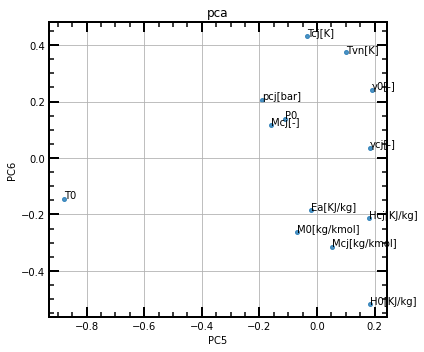

In [9]:
plt.figure(figsize=(6,5))
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
for x, y, name in zip(pca.components_[0], pca.components_[1], X_train.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("pca")
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6,5))
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
for x, y, name in zip(pca.components_[2], pca.components_[3], X_train.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[2], pca.components_[3], alpha=0.8)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title("pca")
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6,5))
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
for x, y, name in zip(pca.components_[4], pca.components_[5], X_train.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[4], pca.components_[5], alpha=0.8)
plt.xlabel("PC5")
plt.ylabel("PC6")
plt.title("pca")
plt.grid(True)
plt.tight_layout()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


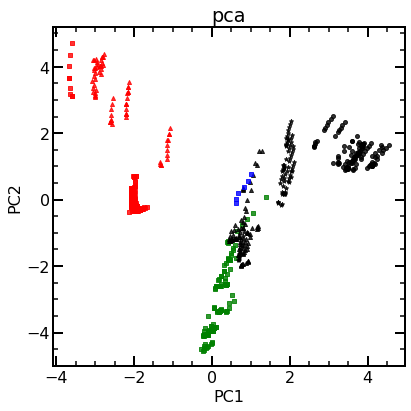

<Figure size 432x288 with 0 Axes>

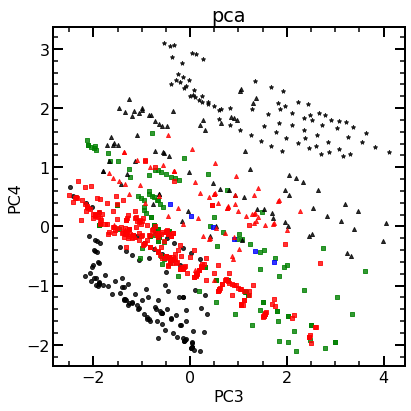

<Figure size 432x288 with 0 Axes>

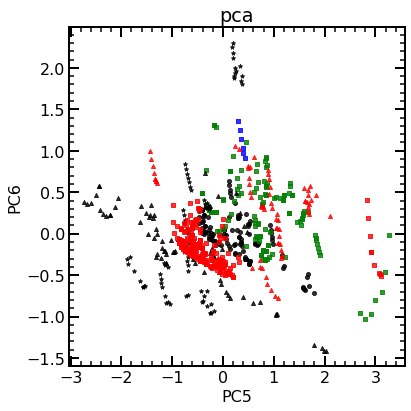

<Figure size 432x288 with 0 Axes>

In [10]:
#MSE vs サーチケース
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

def plot_feature_importance(df):
    n_features = len(df)
    df_plot = df.sort_values('importance')
    f_importance_plot = df_plot['importance'].values
    plt.barh(range(n_features), f_importance_plot, align='center')
    cols_plot = df_plot['feature'].values
    plt.yticks(np.arange(n_features), cols_plot)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

#reaction length
df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','P0', 'T0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]','Ea[KJ/kg]','Lr']

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]

XpcaFLRDED = XpcaFLRDED[~( XpcaFLRDED['Ea[KJ/kg]'] == 0)]

Xpca = XpcaFLRDED.drop(columns=['Lr','Diluent','Fuel'])

sXpca = ss.fit_transform(Xpca)

from sklearn.decomposition import PCA #主成分分析器

#主成分分析の実行
pca = PCA()
pca.fit(sXpca)
# データを主成分空間に写像
feature = pca.transform(sXpca)

Diluent=list(XpcaFLRDED['Diluent'])
Fuel=list(XpcaFLRDED['Fuel'])
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]
y7=[]
z1=[]
z2=[]
z3=[]
z4=[]
z5=[]
z6=[]
z7=[]
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
m1=[]
m2=[]
m3=[]
m4=[]
m5=[]
m6=[]
m7=[]
pc1=feature[:, 0]
pc2=feature[:, 1]
pc3=feature[:, 2]
pc4=feature[:, 3]
pc5=feature[:, 4]
pc6=feature[:, 5]

for i in range(len(XpcaFLRDED)):
    if Fuel[i]=='H2':
        markers1='o'
        col1='black'
        x1.append(pc1[i])
        y1.append(pc2[i])
        z1.append(pc3[i])
        k1.append(pc4[i])
        l1.append(pc5[i])
        m1.append(pc6[i])
    
    elif Fuel[i]=='C2H2':
        if Diluent[i]=='N2':
            markers2='s'
            col2='blue'
            x2.append(pc1[i])
            y2.append(pc2[i])
            z2.append(pc3[i])
            k2.append(pc4[i])
            l2.append(pc5[i])
            m2.append(pc6[i])
    
        elif Diluent[i]=='Ar':
            markers3='s'
            col3='red'
            x3.append(pc1[i])
            y3.append(pc2[i])
            z3.append(pc3[i])
            k3.append(pc4[i])
            l3.append(pc5[i])
            m3.append(pc6[i])

        else:
            markers4='s'
            col4='green'
            x4.append(pc1[i])
            y4.append(pc2[i])
            z4.append(pc3[i])
            k4.append(pc4[i])
            l4.append(pc5[i])
            m4.append(pc6[i])            

    elif Fuel[i]=='C2H4':
        if Diluent[i]=='Ar':
            markers5='^'
            col5='red'
            x5.append(pc1[i])
            y5.append(pc2[i])
            z5.append(pc3[i])
            k5.append(pc4[i])
            l5.append(pc5[i])
            m5.append(pc6[i])            

        else:
            markers6='^'
            col6='black'
            x6.append(pc1[i])
            y6.append(pc2[i])
            z6.append(pc3[i])
            k6.append(pc4[i])
            l6.append(pc5[i])
            m6.append(pc6[i])
    else:
        markers7='*'
        col7='black'
        x7.append(pc1[i])
        y7.append(pc2[i])
        z7.append(pc3[i])
        k7.append(pc4[i])
        l7.append(pc5[i])
        m7.append(pc6[i])        

plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

'''
plt.scatter(z1,y1, alpha=0.8, c=col1,marker=markers1,label='H2')
plt.scatter(z4,y4, alpha=0.8, c=col4,marker=markers4,label='C2H2')
plt.scatter(z6,y6, alpha=0.8, c=col6,marker=markers6,label='C2H4')
plt.scatter(z7,y7, alpha=0.8, c=col7,marker=markers7,label='C2H6')
plt.scatter(z2,y2, alpha=0.8, c=col2,marker=markers2,label='C2H2/N2')
plt.scatter(z3,y3, alpha=0.8, c=col3,marker=markers3,label='C2H2/Ar')
plt.scatter(z5,y5, alpha=0.8, c=col5,marker=markers5,label='C2H4/Ar')
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.title("pca")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")
'''
plt.scatter(x1,y1, alpha=0.8, c=col1,marker=markers1)
plt.scatter(x4,y4, alpha=0.8, c=col4,marker=markers4)
plt.scatter(x6,y6, alpha=0.8, c=col6,marker=markers6)
plt.scatter(x7,y7, alpha=0.8, c=col7,marker=markers7)
plt.scatter(x2,y2, alpha=0.8, c=col2,marker=markers2)
plt.scatter(x3,y3, alpha=0.8, c=col3,marker=markers3)
plt.scatter(x5,y5, alpha=0.8, c=col5,marker=markers5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("pca")
#plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")

plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

'''
plt.scatter(z1,y1, alpha=0.8, c=col1,marker=markers1,label='H2')
plt.scatter(z4,y4, alpha=0.8, c=col4,marker=markers4,label='C2H2')
plt.scatter(z6,y6, alpha=0.8, c=col6,marker=markers6,label='C2H4')
plt.scatter(z7,y7, alpha=0.8, c=col7,marker=markers7,label='C2H6')
plt.scatter(z2,y2, alpha=0.8, c=col2,marker=markers2,label='C2H2/N2')
plt.scatter(z3,y3, alpha=0.8, c=col3,marker=markers3,label='C2H2/Ar')
plt.scatter(z5,y5, alpha=0.8, c=col5,marker=markers5,label='C2H4/Ar')
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.title("pca")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")
'''
plt.scatter(z1,k1, alpha=0.8, c=col1,marker=markers1)
plt.scatter(z4,k4, alpha=0.8, c=col4,marker=markers4)
plt.scatter(z6,k6, alpha=0.8, c=col6,marker=markers6)
plt.scatter(z7,k7, alpha=0.8, c=col7,marker=markers7)
plt.scatter(z2,k2, alpha=0.8, c=col2,marker=markers2)
plt.scatter(z3,k3, alpha=0.8, c=col3,marker=markers3)
plt.scatter(z5,k5, alpha=0.8, c=col5,marker=markers5)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title("pca")
#plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")

plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

'''
plt.scatter(z1,y1, alpha=0.8, c=col1,marker=markers1,label='H2')
plt.scatter(z4,y4, alpha=0.8, c=col4,marker=markers4,label='C2H2')
plt.scatter(z6,y6, alpha=0.8, c=col6,marker=markers6,label='C2H4')
plt.scatter(z7,y7, alpha=0.8, c=col7,marker=markers7,label='C2H6')
plt.scatter(z2,y2, alpha=0.8, c=col2,marker=markers2,label='C2H2/N2')
plt.scatter(z3,y3, alpha=0.8, c=col3,marker=markers3,label='C2H2/Ar')
plt.scatter(z5,y5, alpha=0.8, c=col5,marker=markers5,label='C2H4/Ar')
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.title("pca")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")
'''
plt.scatter(l1,m1, alpha=0.8, c=col1,marker=markers1)
plt.scatter(l4,m4, alpha=0.8, c=col4,marker=markers4)
plt.scatter(l6,m6, alpha=0.8, c=col6,marker=markers6)
plt.scatter(l7,m7, alpha=0.8, c=col7,marker=markers7)
plt.scatter(l2,m2, alpha=0.8, c=col2,marker=markers2)
plt.scatter(l3,m3, alpha=0.8, c=col3,marker=markers3)
plt.scatter(l5,m5, alpha=0.8, c=col5,marker=markers5)
plt.xlabel("PC5")
plt.ylabel("PC6")
plt.title("pca")
#plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")

In [54]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle

# One class support vector machine (OCSVM) モデルを構築する
clf = OneClassSVM(nu = 0.1)
y_train_class = clf.fit_predict(sX_train_pca.drop(columns=['PC5','PC3','PC2']))
#y_test_classC3H6N2O = clf.predict(sXC3H6N2Otest_pca)
y_test_classC2H2AR = clf.predict(sXC2H2ARtest_pca.drop(columns=['PC5','PC3','PC2']))
y_test_classC2H2N2 = clf.predict(sXC2H2N2test_pca.drop(columns=['PC5','PC3','PC2']))

print(sXC2H2ARtest_pca)

          PC1       PC2       PC3       PC4       PC5       PC6
0    1.513851  1.370833 -2.500506  0.407043 -1.377131 -0.139851
1    1.521200  1.384262 -2.476777  0.383419 -1.432745 -0.156235
2    1.513191  1.375609 -2.448305  0.364652 -1.433862 -0.155118
3    1.562189  1.424902 -2.307601  0.274921 -1.425278 -0.230218
4    1.592497  1.444957 -2.243496  0.243035 -1.347732 -0.264389
..        ...       ...       ...       ...       ...       ...
231  2.477023  1.111881  0.948066 -1.428361 -1.507116 -0.517038
232  2.578462  1.014841  1.293551 -1.591382 -1.577521 -0.479109
233  2.561313  1.010319  1.271102 -1.594718 -1.715241 -0.466142
234  2.710702  0.903826  1.698610 -1.778395 -1.664161 -0.435166
235  2.712486  0.901009  1.706720 -1.781629 -1.665753 -0.433731

[236 rows x 6 columns]


/home/hiroki/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/hiroki/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'solver': 'adam'}
Best cross-validation: 0.9202569351881863
0.6247437093452247 0.4267106438712954 C2H2AR
-3.2380798559251964 C2H2N2
42.95021993539727 0.4267106438712954 C2H2AR
54.12103854598214 C2H2N2


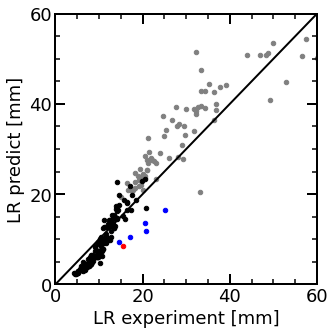

In [55]:
sol=['adam']
act=['relu']
hidd=[]

for i in [6]:
    for j in [200]:
        b=[j]*i
        b=tuple(b)
        hidd.append(b)

alp=[1e-4]
param_grid = {'solver':sol,'activation':act,'hidden_layer_sizes':hidd,'alpha':alp}
from sklearn.linear_model import LinearRegression
grid1=GridSearchCV(MLPRegressor(), param_grid , cv=3, n_jobs=4)
grid1.fit(sX_train_pca,y_train)

print('Best parameters: {}'.format(grid1.best_params_))
print('Best cross-validation: {}'.format(grid1.best_score_))

#resultC3H6N2O=grid1.predict(sXC3H6N2Otest_pca)
#MSEC3H6N2O=mean_squared_error(yC3H6N2Otest, resultC3H6N2O)
#R2C3H6N2O=r2_score(yC3H6N2Otest,resultC3H6N2O)

resultC2H2AR=grid1.predict(sXC2H2ARtest_pca)
MSEC2H2AR=mean_squared_error(yC2H2ARtest, resultC2H2AR)
R2C2H2AR=r2_score(yC2H2ARtest,resultC2H2AR)

resultC2H2N2=grid1.predict(sXC2H2N2test_pca)
MSEC2H2N2=mean_squared_error(yC2H2N2test, resultC2H2N2)
R2C2H2N2=r2_score(yC2H2N2test,resultC2H2N2)


plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5


plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
#plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == 1], resultC3H6N2O[y_test_classC3H6N2O == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == -1], resultC3H6N2O[y_test_classC3H6N2O == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2ARtest[y_test_classC2H2AR == -1], resultC2H2AR[y_test_classC2H2AR == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1],s=20,color='blue', label = "AD_inside")
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == -1], resultC2H2N2[y_test_classC2H2N2 == -1],s=20,color='red', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

# AD 内のデータについて R2 値を算出# AD 外のデータについて R2 値を算出
print(r2_score(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1]),r2_score(yC2H2ARtest[y_test_classC2H2AR == -1], resultC2H2AR[y_test_classC2H2AR == -1]),'C2H2AR')
print(r2_score(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1]),'C2H2N2')
print(mean_squared_error(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1]),r2_score(yC2H2ARtest[y_test_classC2H2AR == -1], resultC2H2AR[y_test_classC2H2AR == -1]),'C2H2AR')
print(mean_squared_error(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1]),'C2H2N2')
#print(r2_score(yC3H6N2Otest[y_test_classC3H6N2O == -1], resultC3H6N2O[y_test_classC3H6N2O == -1]),'C3H6N2O')
#print(r2_score(yC2H2ARtest[y_test_classC2H2AR == 1], resultC2H2AR[y_test_classC2H2AR == 1]),'C2H2AR')
#print(r2_score(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1]),r2_score(yC2H2N2test[y_test_classC2H2N2 == -1], resultC2H2N2[y_test_classC2H2N2 == -1]),'C2H2Ar')

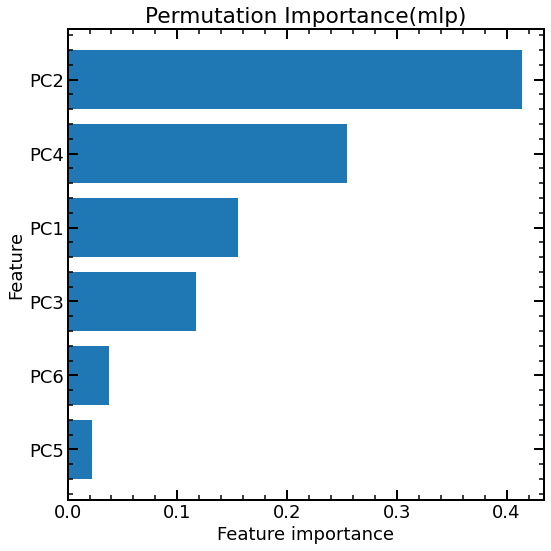

In [35]:
def plot_feature_importance(df):
    n_features = len(df)
    df_plot = df.sort_values('importance')
    f_importance_plot = df_plot['importance'].values
    plt.barh(range(n_features), f_importance_plot, align='center')
    cols_plot = df_plot['feature'].values
    plt.yticks(np.arange(n_features), cols_plot)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


result = permutation_importance(grid1,sX_train_pca,y_train, n_repeats=5, random_state=42)

cols = list(sX_train_pca.columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(result["importances"].mean(axis=1)) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df1=df_importance
df_importance = df_importance.sort_values("importance",ascending=False)

plt.figure(figsize=(8,8))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

# Tick Setting
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
#sns.barplot(x="Importance", y="Features",data=df_importance,ci=None)
plot_feature_importance(df_importance)
plt.title("Permutation Importance(mlp)")
plt.tight_layout()
plt.savefig("gurafu3(OCSVM).png")